In [41]:
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading & Reading the dataset
df=pd.read_csv('bank_marketing.csv')

In [10]:
#Checking uploaded dataset
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 19)

In [6]:
df.ndim

2

# Performing EDA

In [7]:
# Describing the data columns wise
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Checking Data type of each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [9]:
# checking the any Null value in dataset
df.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

# In this Dataset our Target variable is response

In [11]:
# Counting the NO or Yes Response
df['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [12]:
df['response'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

- Here 0 represents the NO response and 1 YES response
- And we can see that, this is imbalanced dataset 
- And for that we can use different techniques to deal with the imbalance dataset like under sampling or over sampling

# But First see the above dataset values we can see that, the pdays has the negative value

##### pdays means, number of days that passed by after the client was last contacted from previous campaign

###### But, days can not be negative so now we will take pdays values which is greater then 0 and -1

In [15]:
Newdf=df[df.pdays>0]

In [16]:
Newdf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [17]:
Newdf.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,57564.006298,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,31791.407761,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,20000.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,70000.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


In [19]:
Newdf['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [20]:
Newdf['pdays'].mean()

224.57769165556496

In [21]:
Newdf['pdays'].median()

194.0

<AxesSubplot:>

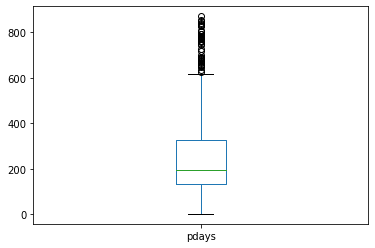

In [23]:
Newdf['pdays'].plot.box()

Text(0.5, 1.0, 'Balance VS Education')

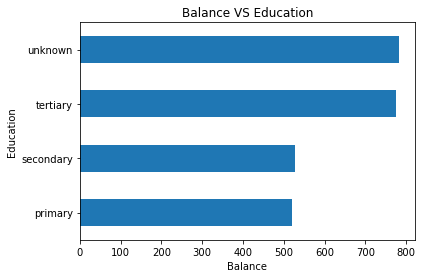

In [60]:
Newdf.groupby(['education']).balance.median().plot.barh()
plt.xlabel('Balance')
plt.ylabel('Education')
plt.title('Balance VS Education')

Text(0.5, 1.0, 'Balance VS Education')

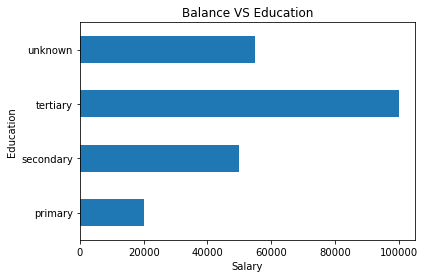

In [26]:
Newdf.groupby(['education']).salary.median().plot.barh()
plt.xlabel('Salary')
plt.ylabel('Education')
plt.title('Balance VS Education')

In [27]:
# After creating Newdf Counting the NO or Yes Response values
Newdf['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [28]:
# After creating Newdf Counting the NO or Yes Response in Percentage
Newdf['response'].value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [30]:
### Now, here I will convert the target feature into the numerical form as machine learning model only works on numerical data
datamapping={'yes':1,'no':0}

In [31]:
Newdf.response=Newdf.response.map(datamapping)

In [32]:
Newdf.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [38]:
cat_col=[]
num_col=[]
for i in Newdf.columns:
    if Newdf[i].dtype=='O':
        cat_col.append(i)
    else:
        num_col.append(i)

In [39]:
print('Categorical variables:',cat_col)
print('Numeric variables:',num_col)

Categorical variables: ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numeric variables: ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


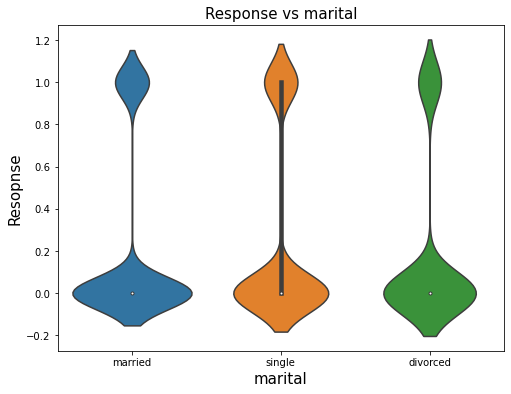

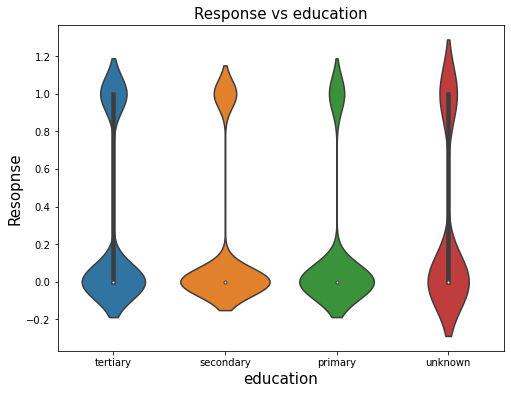

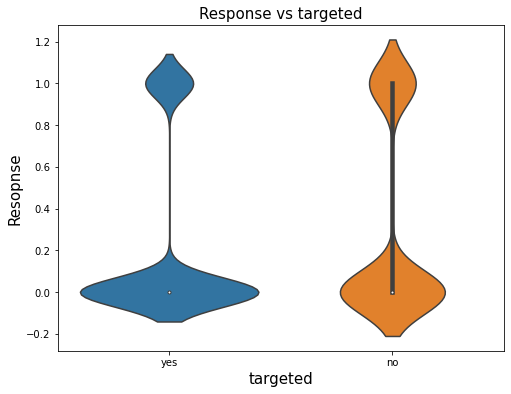

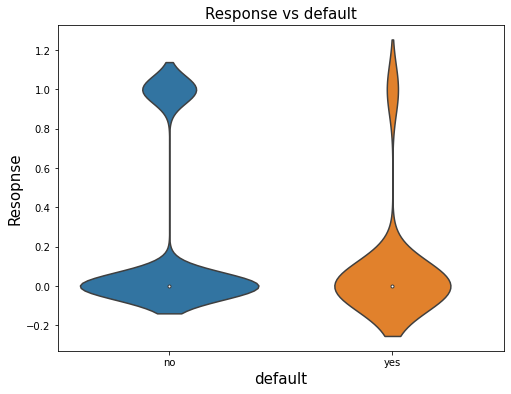

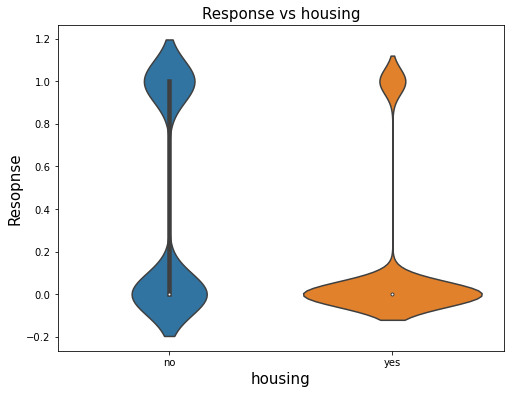

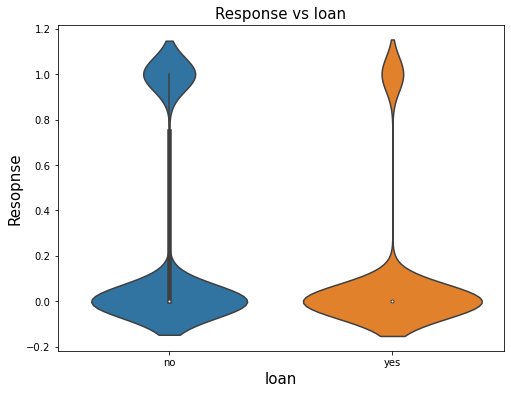

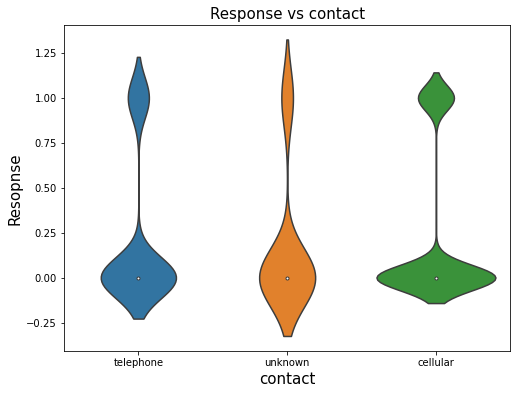

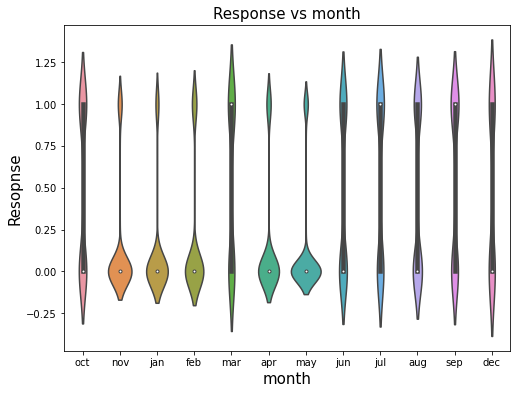

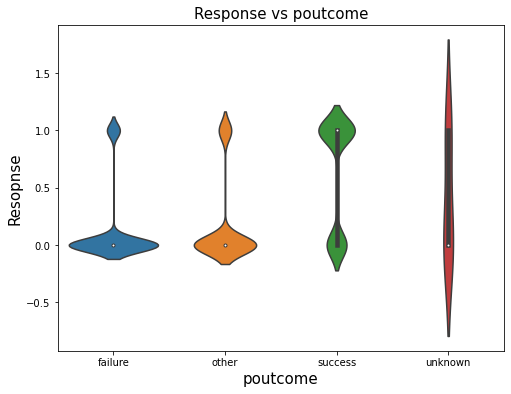

In [42]:
for i in cat_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(Newdf[i],Newdf['response'])
    plt.title('Response vs '+i,fontsize=15)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Resopnse',fontsize=15)
    plt.show()

Text(0.5, 1.0, 'Catogerical VS Numeric')

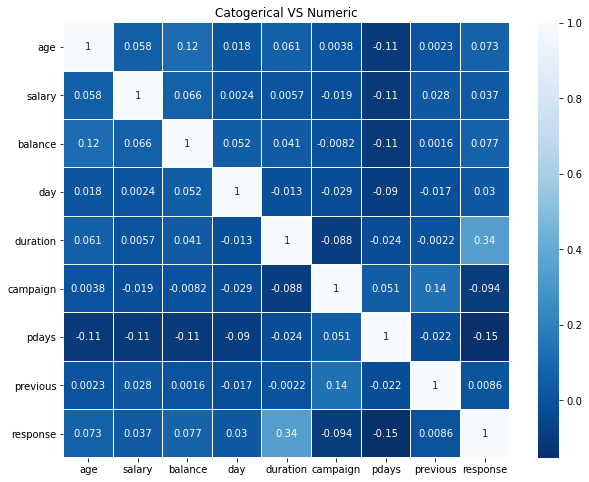

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(Newdf.corr(),annot=True,cmap='Blues_r',linewidths=0.1)
plt.title('Catogerical VS Numeric')

<Figure size 576x432 with 0 Axes>

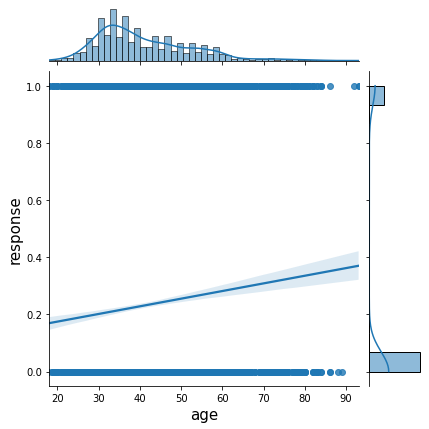

<Figure size 576x432 with 0 Axes>

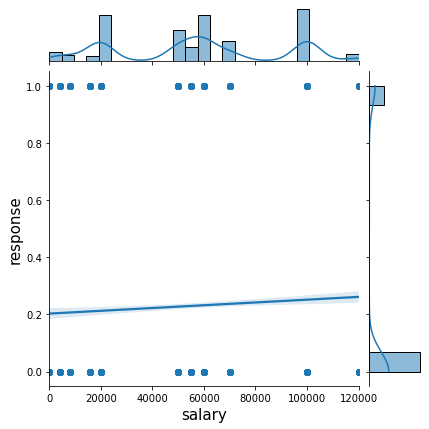

<Figure size 576x432 with 0 Axes>

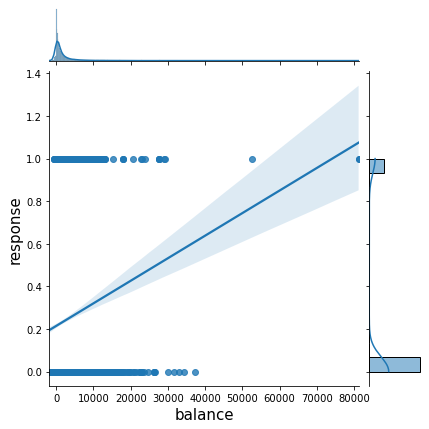

<Figure size 576x432 with 0 Axes>

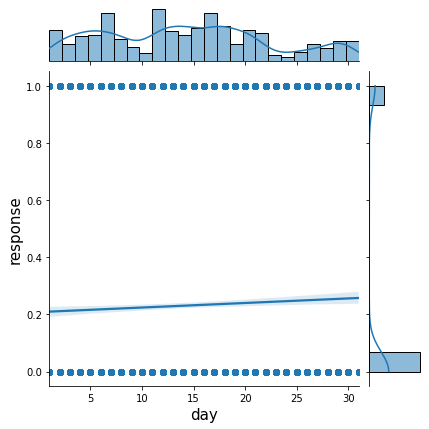

<Figure size 576x432 with 0 Axes>

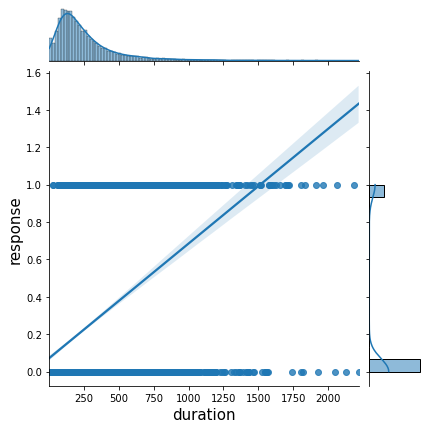

<Figure size 576x432 with 0 Axes>

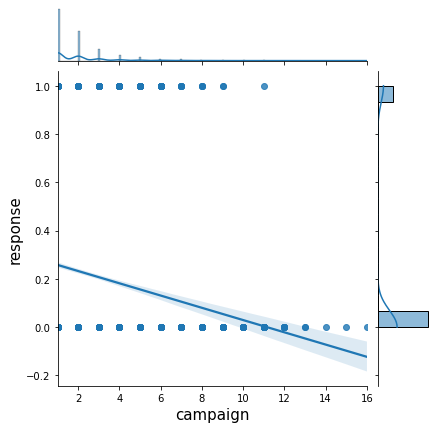

<Figure size 576x432 with 0 Axes>

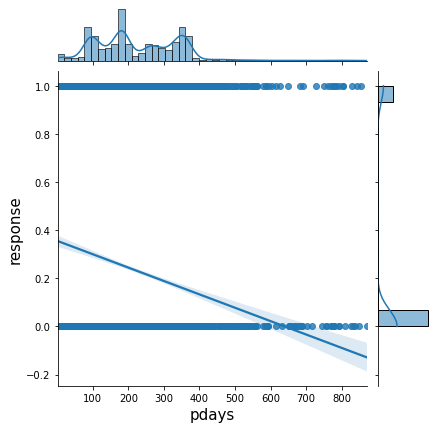

<Figure size 576x432 with 0 Axes>

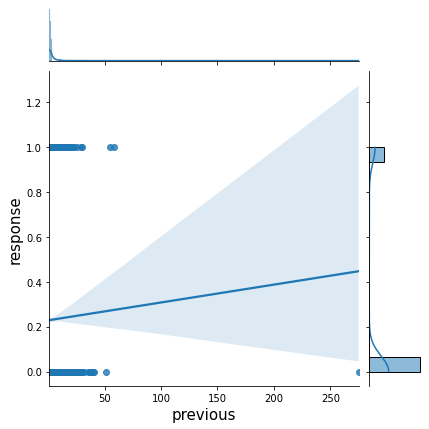

In [44]:
for i in num_col[:-1]:
    plt.figure(figsize=(8,6))
    sns.jointplot(x=Newdf[i],y=Newdf['response'],kind='reg')
    plt.xlabel(i,fontsize=15)
    plt.ylabel('response',fontsize=15)
    plt.show()

## Now, after this I will convert all the categorical features into the numerical type as machine learnign model understand only numerical data

### And for that I will use LabelEncoder from sklearn library to convert the categorical features into numerical

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
LabelEncoder()

LabelEncoder()

In [47]:
# convert all the catogerical values into numeric using LabelEncoder
lecv=Newdf[cat_col].apply(LabelEncoder().fit_transform)

In [48]:
lecv.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [49]:
num=Newdf[num_col]

In [50]:
num.head()

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0
24062,42,50000,-247,21,519,1,166,1,1
24064,33,70000,3444,21,144,1,91,4,1
24072,36,100000,2415,22,73,1,86,4,0
24077,36,100000,0,23,140,1,143,3,1


In [51]:
dfmain=lecv.join(num)

In [52]:
dfmain.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [53]:
dfmain.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


<AxesSubplot:>

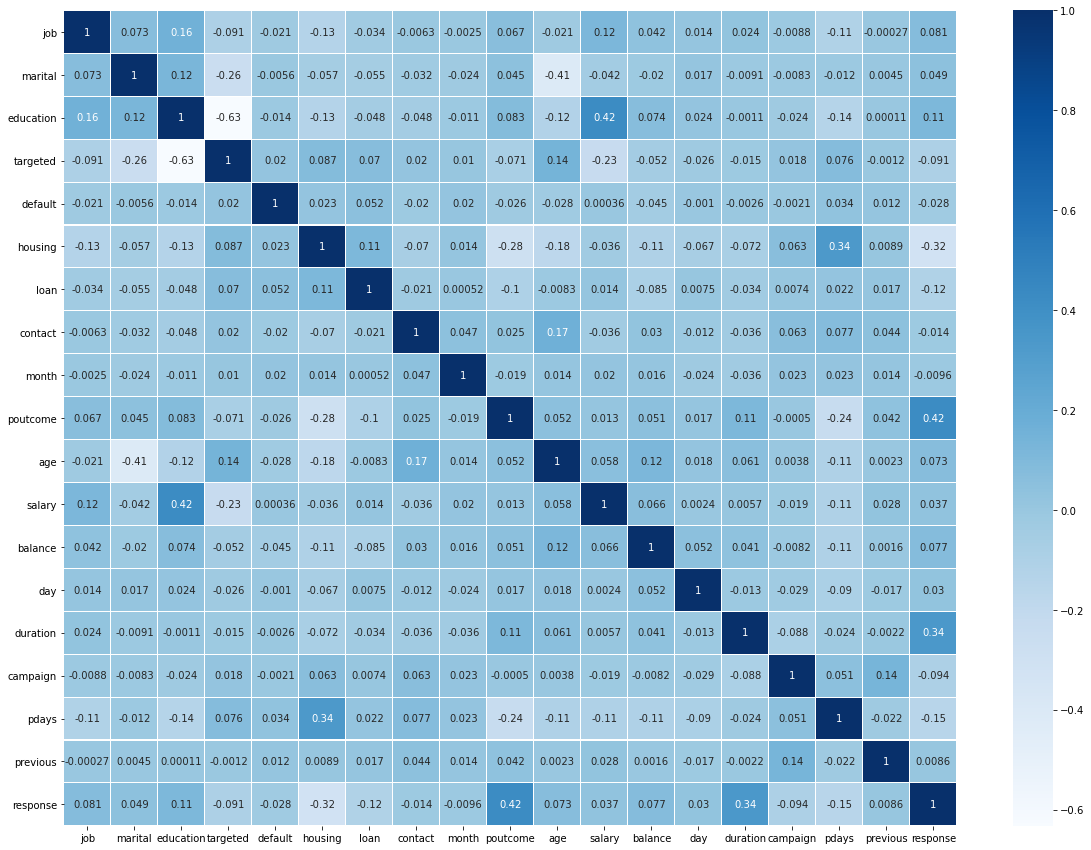

In [54]:
plt.figure(figsize=(20,15))
sns.heatmap(dfmain.corr(),annot=True,cmap='Blues',linewidths=0.1)

# Performing the training and testing so that we can build our model

### So, now we will store the independent and dependent variable into new variable

In [55]:
# storing the independent and dependent features in x & y variable
x=dfmain.drop('response',axis=1)
y=dfmain['response']

In [57]:
x.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [58]:
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

#### now we will split the dataset into training and testing

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr=LogisticRegression()

In [64]:
lr

LogisticRegression()

In [65]:
lr.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred=lr.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
# checking the accuracy on training data
y_pred_train=lr.predict(x_train)
training_data_accuracy = accuracy_score(y_pred_train,y_train)
print('Training Dataset Accuracy',training_data_accuracy)

Training Dataset Accuracy 0.7788039364118092


In [70]:
# checking the accuracy on test data
accuracy_score(y_test,y_pred)

0.7875302663438256

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.87      1279
           1       0.58      0.21      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.76      0.79      0.75      1652



In [74]:
confusion_matrix(y_test,y_pred)

array([[1224,   55],
       [ 296,   77]], dtype=int64)

- Now, after this we can see the confusion matrix that, TP(True Positive) records are high and TN(True Nigative) records are low but the FN(False Nigative) and FP(False Positive) records are low
- And our main goal is to lower the value of the FN(False Nigative) and FP(False Positive)
- And for that we can use different techniques and as our dataset is imbalance so here we can use different sampling techniques

#### Now we will use CV and some hyperparameter to deal with this data and then I will check the new score of the model

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

In [78]:
Log_Class = LogisticRegression()
grid = {'C':10.0**np.arange(-2,3), 'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None, shuffle=False)

In [79]:
LC= GridSearchCV(Log_Class, grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [80]:
LC.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [81]:
y_predgrid = LC.predict(x_test)
print(confusion_matrix(y_test,y_predgrid))
print(accuracy_score(y_test,y_predgrid))
print(classification_report(y_test,y_predgrid))

[[1227   52]
 [ 300   73]]
0.7869249394673123
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.29       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.58      1652
weighted avg       0.75      0.79      0.74      1652



# RandomForest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
# checking the accuracy on training data
y_train_RFC = RFC.predict(x_train)
training_data_accuracy = accuracy_score(y_train_RFC,y_train)
print('Training Dataset Accuracy', training_data_accuracy)

Training Dataset Accuracy 1.0


In [84]:
# accuracy score and classification report of the Random Forest
y_pred_RFC = RFC.predict(x_test)
print(confusion_matrix(y_test,y_pred_RFC))
print(accuracy_score(y_test,y_pred_RFC))
print(classification_report(y_test,y_pred_RFC))

[[1182   97]
 [ 148  225]]
0.8516949152542372
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1279
           1       0.70      0.60      0.65       373

    accuracy                           0.85      1652
   macro avg       0.79      0.76      0.78      1652
weighted avg       0.85      0.85      0.85      1652



# Now, I will use oversampling and then use the Random Forest Classifier model to check the score again and I will check again the FN and FP

In [85]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [97]:
ROS = RandomOverSampler(0.5)
x_train_ros, y_train_ros = ROS.fit_resample(x_train, y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ros)))

The number of classes before fitCounter({0: 5073, 1: 1532})
The number of classes after fitCounter({0: 5073, 1: 2536})


In [98]:
from sklearn.ensemble import RandomForestClassifier
OS_RFC_Classifier = RandomForestClassifier()
OS_RFC_Classifier.fit(x_train_ros, y_train_ros)

RandomForestClassifier()

In [99]:
y_pred_OS_RFC = OS_RFC_Classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred_OS_RFC))
print(accuracy_score(y_test,y_pred_OS_RFC))
print(classification_report(y_test,y_pred_OS_RFC))

[[1180   99]
 [ 130  243]]
0.8613801452784504
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1279
           1       0.71      0.65      0.68       373

    accuracy                           0.86      1652
   macro avg       0.81      0.79      0.80      1652
weighted avg       0.86      0.86      0.86      1652



# Xgboost Classifier

In [101]:
# Hyper Parameter Optimization
params = {
  "learning_rate"    : [0.05,0.10,0.15,0.20,0.25,0.30],
  "max_depth"        : [3,4,5,6,8,10,12,15],
  "min_child_weight" : [1,3,5,7],
  "gamma"            : [0.0,0.1,0.2,0.3,0.4],
  "colsample_bytree" : [0.3,0.4,0.5,0.7],
    }

In [133]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xb
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [134]:
cv = StratifiedKFold(n_splits=5,random_state=None, shuffle=False)

In [135]:
classifier=xb.XGBClassifier()

In [136]:
classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [137]:
random_searchcv = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=cv)

In [141]:
random_searchcv.fit(x_train, y_train)

[00:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=N...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           valida

In [142]:
y_pred_xb=random_searchcv.predict(x_test)

In [143]:
print(confusion_matrix(y_test, y_pred_xb))
print(classification_report(y_test, y_pred_xb))
print("Testing Dataset Accuracy: ", accuracy_score(y_test, y_pred_xb))

[[1190   89]
 [ 147  226]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1279
           1       0.72      0.61      0.66       373

    accuracy                           0.86      1652
   macro avg       0.80      0.77      0.78      1652
weighted avg       0.85      0.86      0.85      1652

Testing Dataset Accuracy:  0.8571428571428571
